In [1]:
!pip3 install torch


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


## Marginal Shapley values - Test 1

In [2]:
from simulations import simulation1, simulation2
from shapley_values.causal_shap import Explainer, ShapleyValuesType
from shapley_values.utils import get_baseline
import numpy as np
from sklearn.linear_model import LinearRegression
import shap

np.random.seed(0)

X_test1, y_test1 = simulation1(num_samples=10000)

model_test1 = LinearRegression()
model_test1.fit(X_test1, y_test1)

feature_names = ["P", "F"]

sample = np.array([1.06, 2.43])

explainer = Explainer(X = X_test1, model = model_test1, is_classification=False, rounding_precision = 2, feature_names = feature_names)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.MARGINAL)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Baseline Value (E[f(X)]):  0.9405372674048602
Predicted Value (f(x))  [1.31962721]
Shapley Values + (E[f(X)]):  1.32


In [3]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X_test1, model_test1),
                                output_names=['Prediction'])

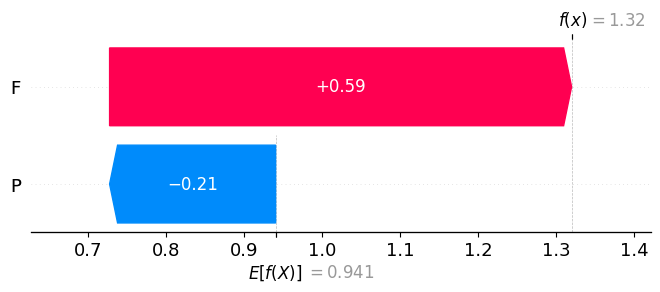

In [4]:
shap.plots.waterfall(explanation)

## Marginal Shapley values - Test 2

In [5]:
X_test2, y_test2 = simulation2(num_samples=10000)

model_test2 = LinearRegression()
model_test2.fit(X_test2, y_test2)

feature_names = ["P", "F"]

sample = np.array([4, 3.8])

explainer = Explainer(X = X_test2, model = model_test2, is_classification=False, rounding_precision = 1, feature_names = feature_names)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.MARGINAL)

Baseline Value (E[f(X)]):  0.9784966758364484
Predicted Value (f(x))  [3.8031419]
Shapley Values + (E[f(X)]):  3.803


In [6]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X_test2, model_test2),
                                output_names=['Prediction'])

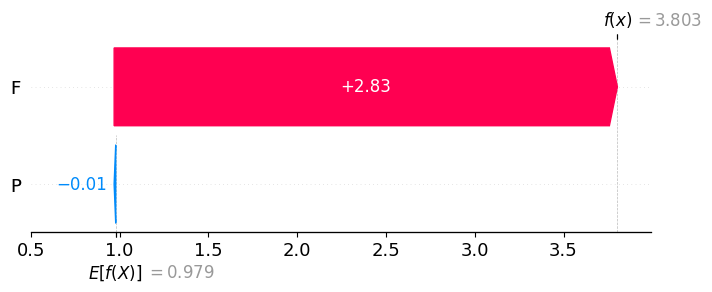

In [7]:
shap.plots.waterfall(explanation)

## Asymmetric Marginal Shapley values - Test 1

In [8]:
feature_names = ["P", "F"]

causal_model = {"P": "F"}

sample = np.array([1.06, 2.43])

explainer = Explainer(X = X_test1, model = model_test1, is_classification=False, rounding_precision = 2, feature_names = feature_names)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.MARGINAL, is_asymmetric=False, causal_model = causal_model)

Baseline Value (E[f(X)]):  0.9405372674048602
Predicted Value (f(x))  [1.31962721]
Shapley Values + (E[f(X)]):  1.32


In [9]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X_test1, model_test1),
                                output_names=['Prediction'])

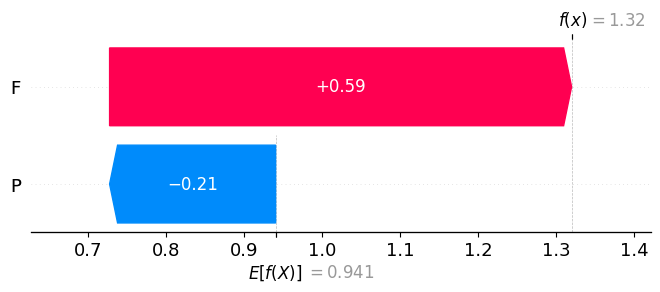

In [10]:
shap.plots.waterfall(explanation)

## Asymmetric Marginal Shapley values - Test 2

In [11]:
causal_model = {"F": "P"}

In [12]:
feature_names = ["P", "F"]

sample = np.array([4, 3.8])

explainer = Explainer(X = X_test2, model = model_test2, is_classification=False, rounding_precision = 1, feature_names = feature_names)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.MARGINAL, is_asymmetric=True, causal_model=causal_model)

Baseline Value (E[f(X)]):  0.9784966758364484
Predicted Value (f(x))  [3.8031419]
Shapley Values + (E[f(X)]):  3.803


In [13]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X_test2, model_test2),
                                output_names=['Prediction'])

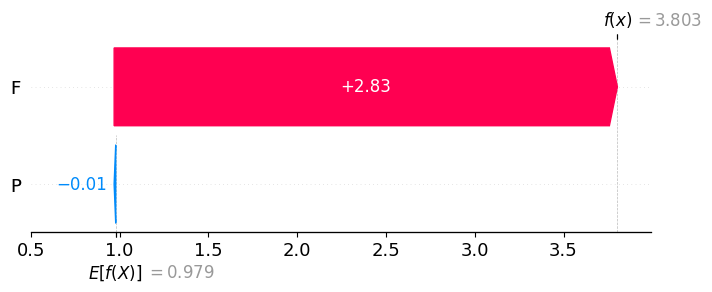

In [14]:
shap.plots.waterfall(explanation)